- https://lucaseo.github.io/posts/2021-01-22-hands-on-preprocess-audio-data/
- https://www.youtube.com/watch?v=vIPIuU_nd9o

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import librosa.display

file_path = '/content/이충주-02-기억해 둘 것.mp3' # 실습에 사용할 음악 파일

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ipd.Audio(file_path)

Output hidden; open in https://colab.research.google.com to view.

1. waveform

In [ ]:
wav, sr = librosa.load(file_path)

print("Amplitude: \n", wav)
print("Sampling rate: ", sr)

Amplitude: 
 [-1.41588525e-05  3.09758138e-06 -3.41413283e-06 ...  3.07471879e-07
 -4.86031013e-06 -6.86891372e-06]
Sampling rate:  22050


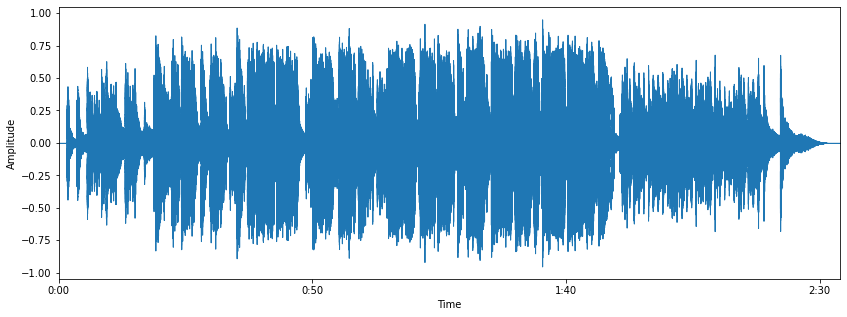

In [ ]:
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(wav, sr=sr)
plt.ylabel("Amplitude")
plt.show()

2. FFT ((Fast Fourier Transform))

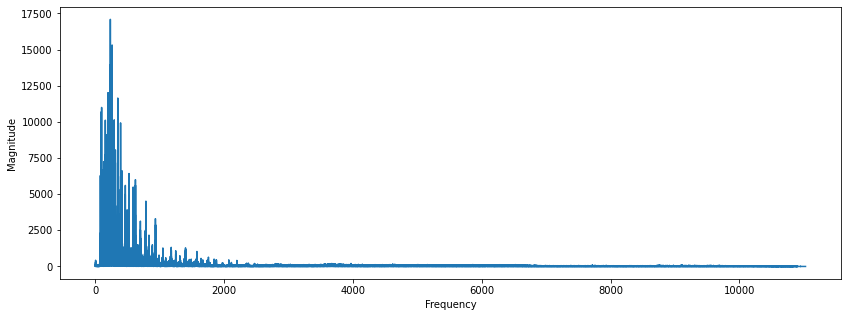

In [ ]:
fft = np.fft.fft(wav) 

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (14,5))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

3. STFT (Short-Time Fourier Transform)

In [ ]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(wav, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[6.5181620e-04 9.0709468e-04 1.0743471e-03 ... 3.2130265e-04
  5.4812874e-04 5.7603634e-04]
 [1.0749237e-04 6.0059840e-04 6.1890413e-04 ... 2.6564169e-04
  3.1398510e-04 2.9664292e-04]
 [1.4726410e-04 3.4074564e-04 1.0706792e-04 ... 2.4075912e-04
  8.4307430e-05 2.5326397e-05]
 ...
 [3.4059431e-05 1.7603184e-05 9.0248329e-07 ... 8.5202737e-07
  7.8879129e-06 2.2385009e-05]
 [3.4223627e-05 1.6771390e-05 8.8297674e-07 ... 1.2798249e-06
  7.7337481e-06 2.1831731e-05]
 [3.4062185e-05 1.7300925e-05 7.5496388e-07 ... 2.2895514e-07
  6.2803706e-06 2.0903255e-05]]


- 3.1. Spectogram

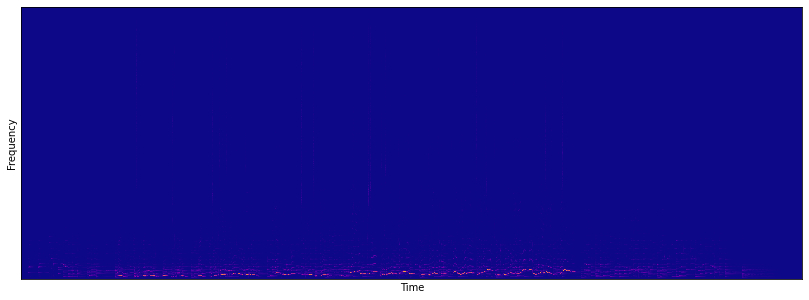

In [ ]:
fig = plt.figure(figsize = (14,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

3.2. Log-spectogram

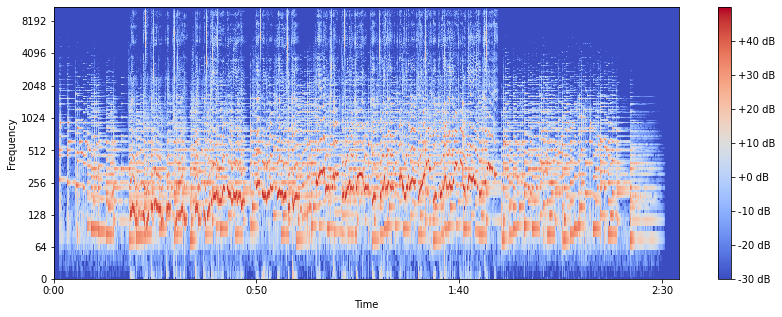

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

fig = plt.figure(figsize = (14,5))
librosa.display.specshow(log_spectrogram, 
                         sr=sr, 
                         hop_length=hop_length,
                         x_axis='time',
                         y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

4. MFCC

In [ ]:
MFCCs = librosa.feature.mfcc(wav, 
                             sr = 22050,
                             n_fft = n_fft,
                             hop_length = hop_length,
                             n_mfcc = 13)   # number of coefficient we want to extract


In [ ]:
print("MFCCs Shape: ", MFCCs.shape)
print("MFCCs: \n", MFCCs)

MFCCs Shape:  (13, 6633)
MFCCs: 
 [[-500.9145 -500.9145 -500.9145 ... -500.9145 -500.9145 -500.9145]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 ...
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]]


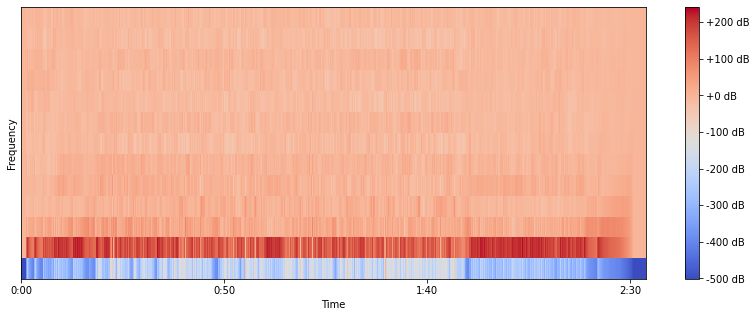

In [ ]:
fig = plt.figure(figsize = (14,5))
librosa.display.specshow(MFCCs, 
                         sr=sr, 
                         hop_length=hop_length,
                         x_axis='time',)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()